In [1]:
from __future__ import division, print_function
import os
import time
import numpy as np
import matplotlib.pyplot as plt

from tga import TGA
from sklearn.decomposition import PCA

Loads the airfoils data

In [2]:
ref_points = np.loadtxt('ref_points.csv', delimiter=',') # X coordinates
X_train = np.loadtxt('airfoils.csv', delimiter=',') # 199 wings
X_test = np.loadtxt('test_afl.csv', delimiter=',') # 200th wing

In [3]:
X_train.shape

(199, 59)

Let us see them

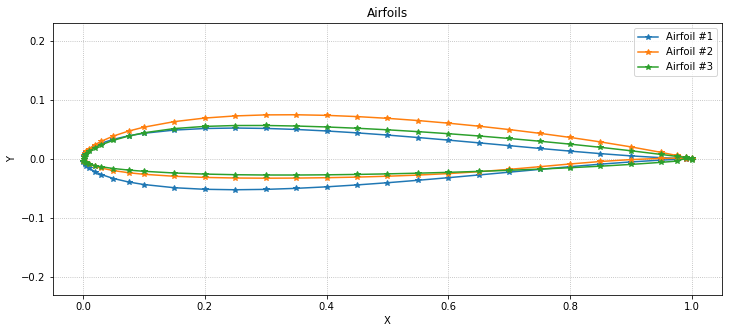

In [4]:
fig = plt.figure(figsize=(12,5))
plt.ylim(-0.23, 0.23)
plt.grid(linestyle="dotted")

#plt.plot(ref_points, test_point, '-*', label = 'Original test')
plt.plot(ref_points, X_train[0, :], '-*', label = 'Airfoil #1')
plt.plot(ref_points, X_train[1, :], '-*', label = 'Airfoil #2')
plt.plot(ref_points, X_train[2, :], '-*', label = 'Airfoil #3')
#plt.plot(ref_points, test_point, label = 'Original')

plt.title("Airfoils")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(['Airfoil #1', 'Airfoil #2', 'Airfoil #3'])

In [5]:
# apply PCA, TGA
pca = PCA()
tga = TGA()
pca.fit(X_train)
tga.fit(X_train)
components_pca = pca.components_
components_tga = tga.components_

Let us take a look at the components

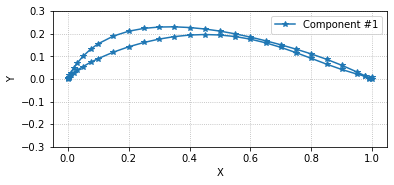

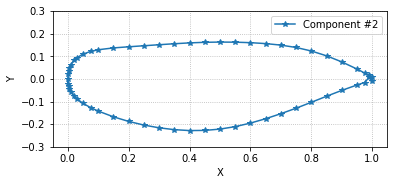

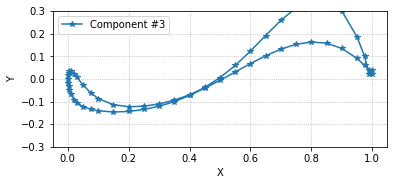

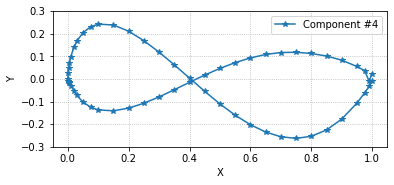

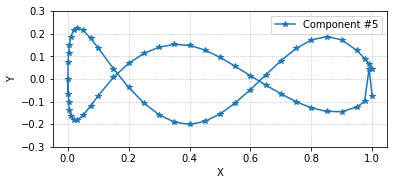

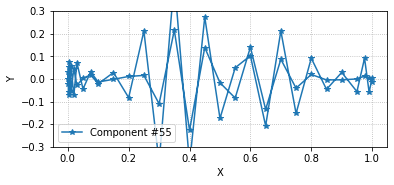

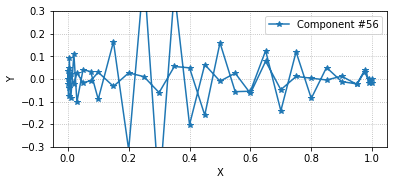

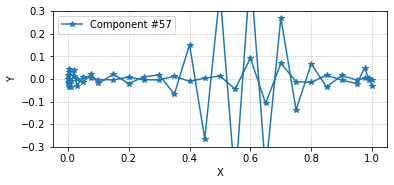

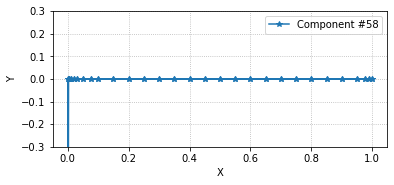

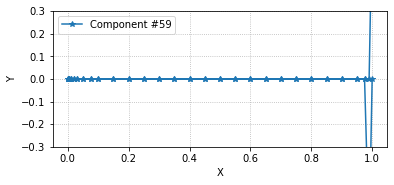

In [6]:
for i in range(5):
    fig = plt.figure(figsize=(6,2.5))
    plt.ylim(-0.3, 0.3)
    plt.grid(linestyle="dotted")
    plt.plot(ref_points, pca.components_[i, :], '-*')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(['Component #{}'.format(i+1)])
    plt.show()
    
for i in range(len(pca.components_) - 5, len(pca.components_)):
    fig = plt.figure(figsize=(6,2.5))
    plt.ylim(-0.3, 0.3)
    plt.grid(linestyle="dotted")
    plt.plot(ref_points, pca.components_[i, :], '-*')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(['Component #{}'.format(i+1)])
    plt.show()

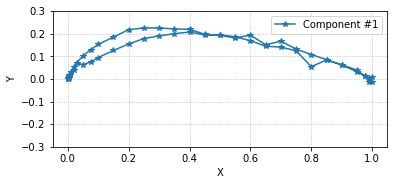

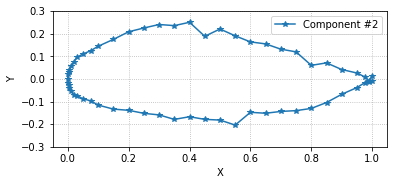

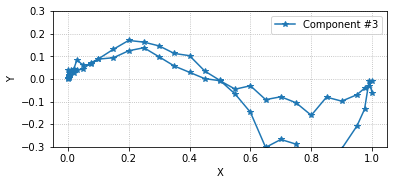

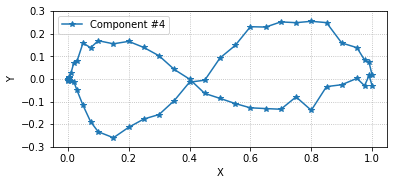

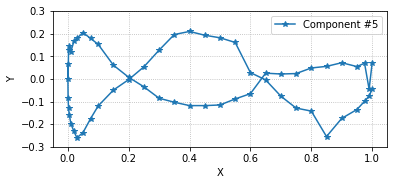

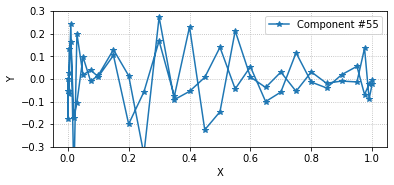

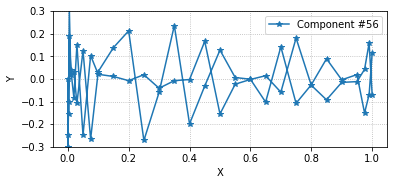

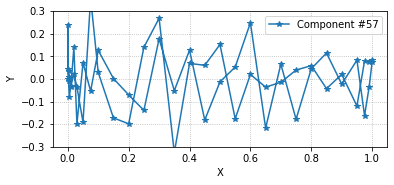

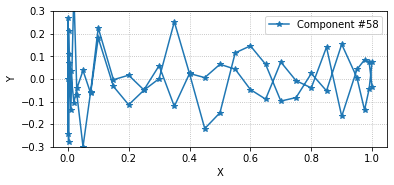

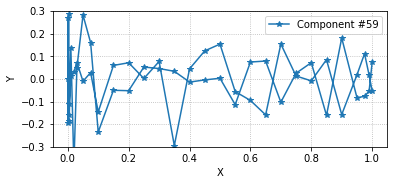

In [7]:
for i in range(5):
    fig = plt.figure(figsize=(6,2.5))
    plt.ylim(-0.3, 0.3)
    plt.grid(linestyle="dotted")
    plt.plot(ref_points, tga.components_[i, :], '-*')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(['Component #{}'.format(i+1)])
    plt.show()
    
for i in range(len(tga.components_) - 5, len(tga.components_)):
    fig = plt.figure(figsize=(6,2.5))
    plt.ylim(-0.3, 0.3)
    plt.grid(linestyle="dotted")
    plt.plot(ref_points, tga.components_[i, :], '-*')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(['Component #{}'.format(i+1)])
    plt.show()

In [8]:
X_pca = pca.transform(X_train)
X_tga = tga.transform(X_train)
X_mean = np.mean(X_train, axis=0)
original_variance = 1./X_train.shape[0] * np.sum((X_train - X_mean)**2)
print('Original variance = ', original_variance) 
cum_pca_var_list = []
cum_tga_var_list = []
X_mean = np.mean(X_train, axis=0)
for i in range(10):
  X_pca_i = np.dot(X_train - X_mean, pca.components_.T[:, :i])
  X_tga_i = np.dot(X_train - X_mean, tga.components_.T[:, :i])
  cum_pca_var_list.append(1./X_pca_i.shape[0] * np.sum((X_pca_i)**2))
  cum_tga_var_list.append(1./X_tga_i.shape[0] * np.sum((X_tga_i)**2))

Original variance =  0.0019891626611588825


In [9]:
pca_var_list = []
tga_var_list = []
for i in range(10):
  X_pca_i = np.dot(X_train - X_mean, pca.components_.T[:, i])
  X_tga_i = np.dot(X_train - X_mean, tga.components_.T[:, i])
  pca_var_list.append(1./X_pca_i.shape[0] * np.sum((X_pca_i)**2))
  tga_var_list.append(1./X_tga_i.shape[0] * np.sum((X_tga_i)**2))

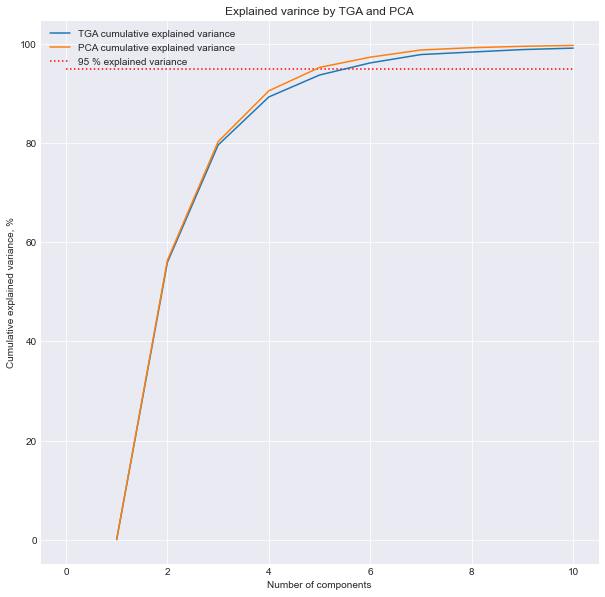

In [10]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
plt.plot(range(1,11), cum_tga_var_list / original_variance * 100, label='TGA cumulative explained variance')
plt.plot( range(1,11),cum_pca_var_list / original_variance * 100, label='PCA cumulative explained variance')
plt.xlabel('Number of components')
plt.hlines(95, 0, 10, colors='r', linestyle='dotted', label='95 % explained variance')
plt.ylabel('Cumulative explained variance, %')
plt.title('Explained varince by TGA and PCA')
plt.legend()
plt.show()

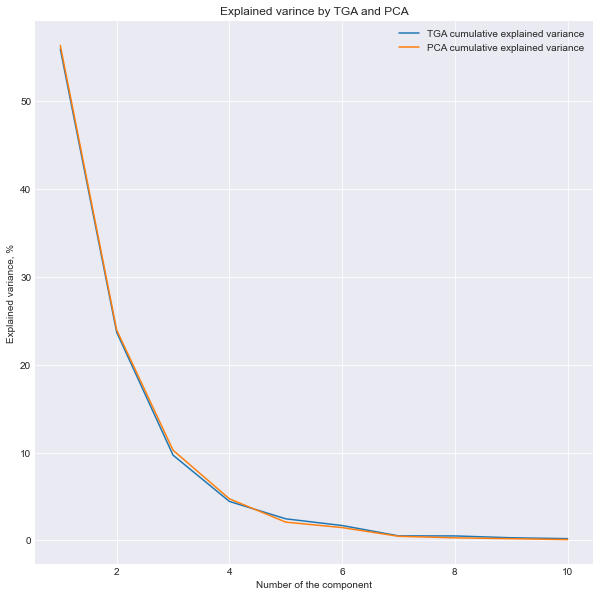

In [11]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
plt.plot(range(1,11), tga_var_list/original_variance*100, label='TGA cumulative explained variance')
plt.plot( range(1,11),pca_var_list/original_variance*100, label='PCA cumulative explained variance')
plt.xlabel('Number of the component')
plt.ylabel('Explained variance, %')
plt.title('Explained varince by TGA and PCA')
plt.legend()
plt.show()

Now let us test the robustness. We will corrupt the each 25th airfoil.

In [12]:
X_train.shape
corruption = []
for i in list(range(X_train.shape[0])):
  corruption_1d = np.zeros(X_train.shape[1])
  if i % 25 == 0:
    corruption_1d[[np.random.randint(0, X_train.shape[1]), np.random.randint(0, X_train.shape[1])]] = 2.5
  corruption.append(corruption_1d)
X_corrupted = X_train + corruption

Let us see what happened

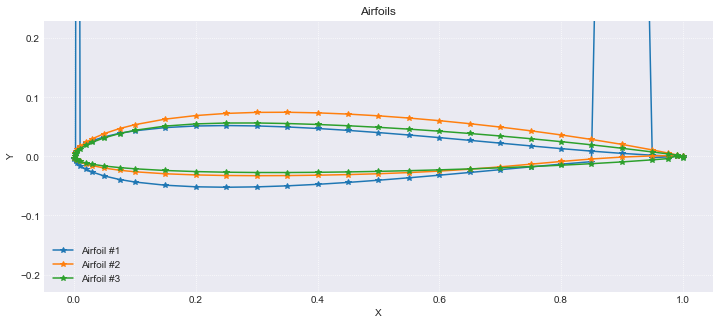

In [13]:
fig = plt.figure(figsize=(12,5))
plt.ylim(-0.23, 0.23)
plt.grid(linestyle="dotted")

#plt.plot(ref_points, test_point, '-*', label = 'Original test')
plt.plot(ref_points, X_corrupted[0, :], '-*', label = 'Airfoil #1')
plt.plot(ref_points, X_corrupted[1, :], '-*', label = 'Airfoil #2')
plt.plot(ref_points, X_corrupted[2, :], '-*', label = 'Airfoil #3')
#plt.plot(ref_points, test_point, label = 'Original')

plt.title("Airfoils")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(['Airfoil #1', 'Airfoil #2', 'Airfoil #3'])

Now let us observe the reaction of PCA and TGA on this corruption

In [14]:
# apply PCA, TGA
pca = PCA()
tga = TGA(centering='median')
pca.fit(X_corrupted)
tga.fit(X_corrupted)
# your code here
components_pca = pca.components_
components_tga = tga.components_

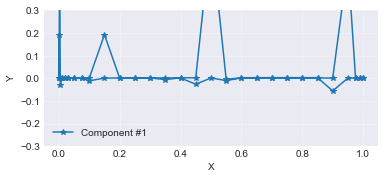

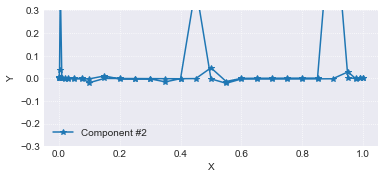

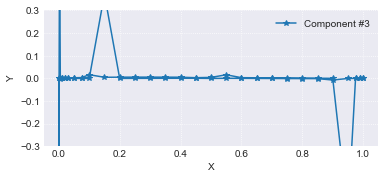

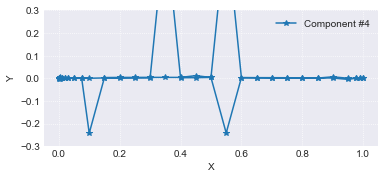

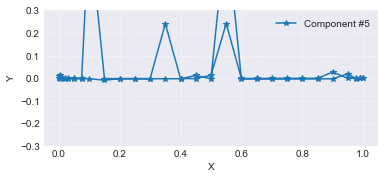

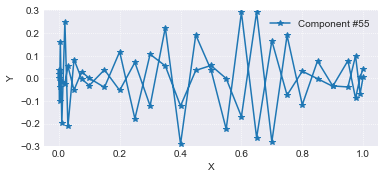

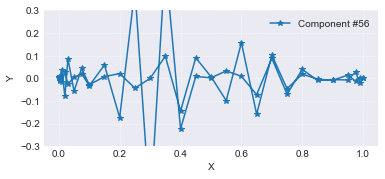

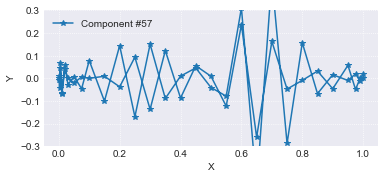

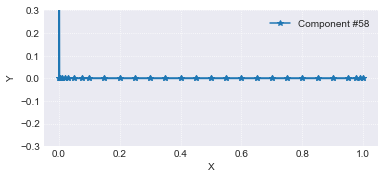

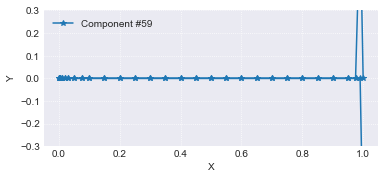

In [15]:
for i in range(5):
    fig = plt.figure(figsize=(6,2.5))
    plt.ylim(-0.3, 0.3)
    plt.grid(linestyle="dotted")
    plt.plot(ref_points, pca.components_[i, :], '-*')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(['Component #{}'.format(i+1)])
    plt.show()
    
for i in range(len(pca.components_) - 5, len(pca.components_)):
    fig = plt.figure(figsize=(6,2.5))
    plt.ylim(-0.3, 0.3)
    plt.grid(linestyle="dotted")
    plt.plot(ref_points, pca.components_[i, :], '-*')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(['Component #{}'.format(i+1)])
    plt.show()

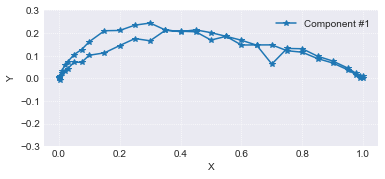

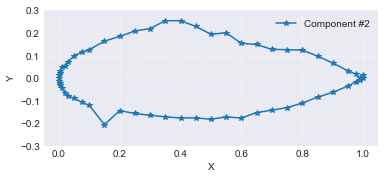

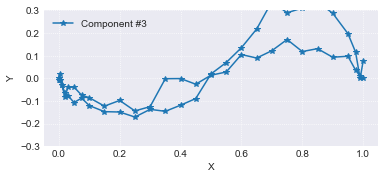

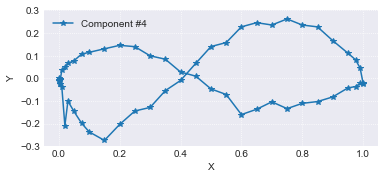

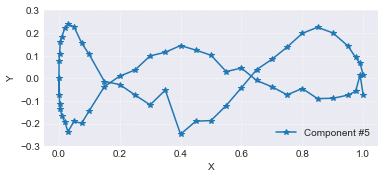

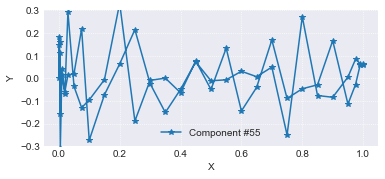

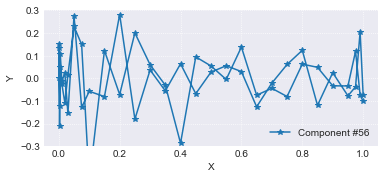

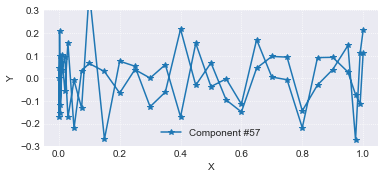

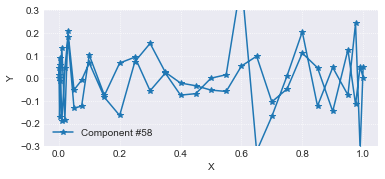

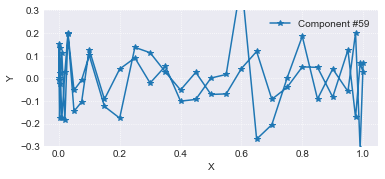

In [16]:
for i in range(5):
    fig = plt.figure(figsize=(6,2.5))
    plt.ylim(-0.3, 0.3)
    plt.grid(linestyle="dotted")
    plt.plot(ref_points, tga.components_[i, :], '-*')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(['Component #{}'.format(i+1)])
    plt.show()
    
for i in range(len(tga.components_) - 5, len(tga.components_)):
    fig = plt.figure(figsize=(6,2.5))
    plt.ylim(-0.3, 0.3)
    plt.grid(linestyle="dotted")
    plt.plot(ref_points, tga.components_[i, :], '-*')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(['Component #{}'.format(i+1)])
    plt.show()